In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.bandits import RandomizedStochasticBandit
from src.agents import ExploreExploit, EpsGreedy, UCB, Thompson
from src.arms import UniformArm, GaussianArm, BernoulliArm

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 300

In [3]:
K = 3
T = 1000

# prior
mu_p = 0.5
sigma_p = 1

# model noise
sigma_n = 0.1

arm_factory = GaussianArm.factory(mu_p, sigma_p, sigma_n)
bandit = RandomizedStochasticBandit(K, arm_factory)
agent = Thompson(bandit, T)

Multi-Armed Bandit Problem
 K=3
 mu_star = 0.6185167397741442
 a_star  = 2

Gaussian Arm mu -0.46266007353991967, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu -1.3618071066723525, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 0.6185167397741442, sigma 0.1.
Posterior is 0.5, 1



In [4]:
def run_agent(agent, title):
    rs = []
    crs = []
    ats = []

    while not agent.terminated():
        reward, cum_reward, a_t = agent.step()
        rs.append(reward)
        crs.append(cum_reward)
        ats.append(a_t)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, 1)
    plt.plot(rs)
    plt.title(title)
    plt.xlabel("Step")
    plt.ylabel("$r_t$")

    plt.subplot(3, 1, 2)
    plt.plot(crs)
    plt.xlabel("Step")
    plt.ylabel("Real. Regret")

    plt.subplot(3, 1, 3)
    plt.plot(ats)
    plt.xlabel("Step");
    plt.ylabel("Action Taken");

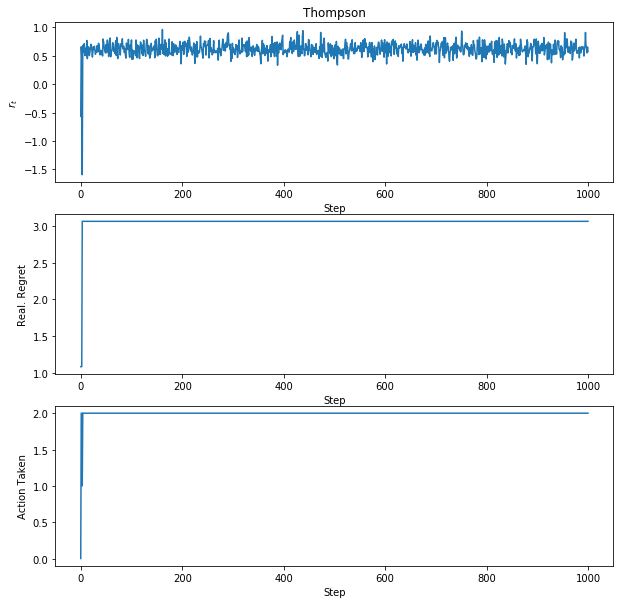

In [5]:
run_agent(agent, "Thompson")

In [6]:
print(bandit.summary_str())

Multi-Armed Bandit Problem
 K=3
 mu_star = 0.6185167397741442
 a_star  = 2

Gaussian Arm mu -0.46266007353991967, sigma 0.1.
Posterior is -0.5544004061861717, 0.09950371902099892

Gaussian Arm mu -1.3618071066723525, sigma 0.1.
Posterior is -1.5728931263600465, 0.09950371902099892

Gaussian Arm mu 0.6185167397741442, sigma 0.1.
Posterior is 0.6223375534881267, 0.0031638441508254804



# Bernoulli Arm

In [23]:
K = 20
T = 1000

# prior
mu_p = 0.5
sigma_p = 1

# model noise
sigma_n = 0.1

arm_factory = BernoulliArm.factory(1, 1)
bandit = RandomizedStochasticBandit(K, arm_factory)
agent = Thompson(bandit, T)

Multi-Armed Bandit Problem
 K=20
 mu_star = 0.9095630531539659
 a_star  = 5

Bernoulli Arm mu 0.8036248851684494, 
Posterior is 1, 1

Bernoulli Arm mu 0.27828514916409935, 
Posterior is 1, 1

Bernoulli Arm mu 0.6702029216523355, 
Posterior is 1, 1

Bernoulli Arm mu 0.10816921124176655, 
Posterior is 1, 1

Bernoulli Arm mu 0.7076500632831877, 
Posterior is 1, 1

Bernoulli Arm mu 0.9095630531539659, 
Posterior is 1, 1

Bernoulli Arm mu 0.1440538947206514, 
Posterior is 1, 1

Bernoulli Arm mu 0.25053776291953245, 
Posterior is 1, 1

Bernoulli Arm mu 0.6475389830126103, 
Posterior is 1, 1

Bernoulli Arm mu 0.6194231595430589, 
Posterior is 1, 1

Bernoulli Arm mu 0.47486271071282504, 
Posterior is 1, 1

Bernoulli Arm mu 0.19807270051051618, 
Posterior is 1, 1

Bernoulli Arm mu 0.483417278038953, 
Posterior is 1, 1

Bernoulli Arm mu 0.4149082382499901, 
Posterior is 1, 1

Bernoulli Arm mu 0.5416722489605075, 
Posterior is 1, 1

Bernoulli Arm mu 0.31180789386348917, 
Posterior is 1, 1

Bernou

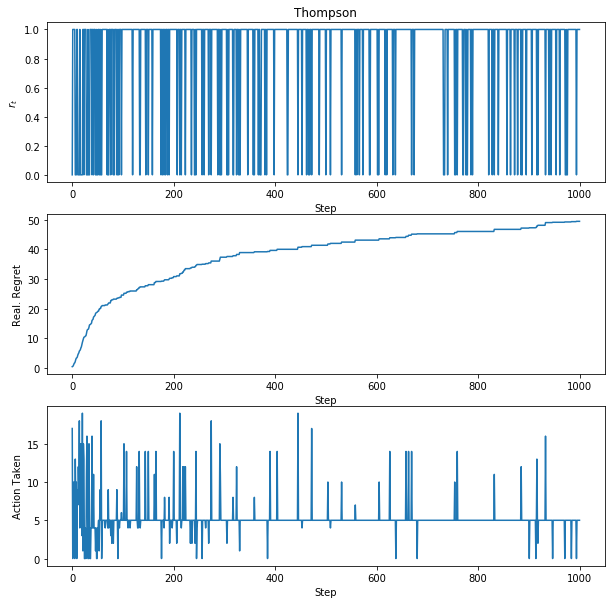

In [24]:
run_agent(agent, "Thompson")

In [25]:
print(bandit.summary_str())

Multi-Armed Bandit Problem
 K=20
 mu_star = 0.9095630531539659
 a_star  = 5

Bernoulli Arm mu 0.8036248851684494, 
Posterior is 21, 7

Bernoulli Arm mu 0.27828514916409935, 
Posterior is 2, 4

Bernoulli Arm mu 0.6702029216523355, 
Posterior is 6, 6

Bernoulli Arm mu 0.10816921124176655, 
Posterior is 1, 3

Bernoulli Arm mu 0.7076500632831877, 
Posterior is 23, 9

Bernoulli Arm mu 0.9095630531539659, 
Posterior is 780, 81

Bernoulli Arm mu 0.1440538947206514, 
Posterior is 1, 3

Bernoulli Arm mu 0.25053776291953245, 
Posterior is 1, 4

Bernoulli Arm mu 0.6475389830126103, 
Posterior is 3, 5

Bernoulli Arm mu 0.6194231595430589, 
Posterior is 2, 5

Bernoulli Arm mu 0.47486271071282504, 
Posterior is 5, 5

Bernoulli Arm mu 0.19807270051051618, 
Posterior is 2, 5

Bernoulli Arm mu 0.483417278038953, 
Posterior is 4, 5

Bernoulli Arm mu 0.4149082382499901, 
Posterior is 1, 4

Bernoulli Arm mu 0.5416722489605075, 
Posterior is 11, 6

Bernoulli Arm mu 0.31180789386348917, 
Posterior is 3, 4

